# **Predicci√≥n de fugas en turbina de Gas mediante Regresi√≥n Lineal y Log√≠stica**

## **An√°lisis Exploratorio del Dataset Sint√©tico "Turbina de Gas (EDA)"**




* Carga del dataset desde el archivo [dataset_sintetico_turbina.xlsx](https://docs.google.com/spreadsheets/d/1_oZbBDCrMdA7AkJRoto9kD10SUSmcaNA/edit?usp=sharing&ouid=106159761848798139754&rtpof=true&sd=true) con librer√≠a Pandas.

In [1]:
import pandas as pd
url = "https://docs.google.com/spreadsheets/d/1_oZbBDCrMdA7AkJRoto9kD10SUSmcaNA/export?format=xlsx" #se modific√≥ el link original a uno de descarga directa
df = pd.read_excel(url)
df.head()

Fecha  Prs. Atm [psi]  Temperatura Ambiente [¬∞F]  \
0 2024-11-20 00:00:00.000       13.522007                  96.383270   
1 2024-11-20 00:25:05.947       13.521007                  96.206360   
2 2024-11-20 00:50:11.893       13.520006                  96.558609   
3 2024-11-20 01:15:17.840       13.519005                  97.107079   
4 2024-11-20 01:40:23.787       13.518004                  97.400673   

   Humedad Relativa  Presi√≥n Dif Filtro [mmH2O]  \
0         15.970631                    0.873634   
1         18.801805                    0.853627   
2         19.416170                    0.859754   
3         17.253881                    0.848567   
4         16.490938                    0.847201   

   Presi√≥n Dif Enclosure [mmH2O]  Temperatura Superior [¬∞F]  \
0                      -1.371458                 120.811760   
1                      -1.339021                 126.104401   
2                      -1.330875                 129.485840   
3                      -1.324683                 131.708008   
4                      -1.334426                 133.349838   

   Temp. Anterior Extracci√≥n [¬∞F]  Temperatura Inferior [¬∞F]  Potencia [MW]  \
0                      143.926956                  99.821655      85.007843   
1                      153.802658                 101.665459      84.256729   
2                      159.741501                 103.001106      83.852791   
3                      164.177841                 104.141899      85.163139   
4                      168.242447                 105.012314      85.528084   

   4-E  1-E  Temp Promedio [¬∞F]  Tprom-Tamb  
0   10   10          121.588063   25.221071  
1   10   10          127.182712   30.976353  
2   10   10          130.729154   34.170549  
3   10   10          133.357805   36.250730  
4   10   10          135.492146   38.091472

 * **Histograma** de cada **variable** e **interpretaci√≥n** de la **forma** de la **distribuci√≥n**.

        > Usando la librer√≠a `plotly.graph_objects`.

In [2]:
import plotly.graph_objects as go

# Filtro: columnas num√©ricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns #devuelve una lista con los nombres de las columnas numericas

for col in numeric_cols:
    fig = go.Figure()

    fig.add_trace(go.Histogram(
        x=df[col],
        marker_color='skyblue',
        opacity=0.8
    ))

    fig.update_layout(
        title=f"Histograma de {col}",
        xaxis_title=col,
        yaxis_title="Frecuencia",
        bargap=0.05 #separaci√≥n entre las barras
    )

    fig.show()


###**Interpretaci√≥n de cada variable**

1. **Prs. Atm [psi]**


- **Media ‚âà** 13.47, **desviaci√≥n baja** (0.04).

- Valores m√≠nimos y m√°ximos muy cercanos (13.38 ‚Äì 13.56).

- **Distribuci√≥n:** fuertemente concentrada, casi uniforme o normal muy estrecha.

- **Interpretaci√≥n:** la presi√≥n atmosf√©rica se mantiene muy estable, con peque√±as oscilaciones (normal en entornos controlados o en un mismo lugar geogr√°fico).

2. **Temperatura Ambiente [¬∞F]**

- **Media** ‚âà 87.5, rango 60‚Äì103 ¬∞F.

- **Desviaci√≥n est√°ndar** 8.4, lo que indica variabilidad moderada.

- **Distribuci√≥n:** probablemente sesgada a la izquierda (m√°s datos en la parte c√°lida, pocos valores bajos).

- **Interpretaci√≥n:** predominan temperaturas altas, pero hay algunos per√≠odos m√°s fr√≠os que alargan la cola izquierda (no frecuente pero presente).

3. **Humedad Relativa**

- **Media ‚âà** 33.5%, rango 8‚Äì72%, **desviaci√≥n alta** (12.7).

- **Distribuci√≥n:** asim√©trica a la derecha, ya que la mayor√≠a de los valores se concentran por debajo del promedio (en torno a 30‚Äì40%).

- **Interpretaci√≥n:** la humedad suele ser baja o moderada, con pocos casos de humedad alta (72%), probablemente d√≠as puntuales.

4. **Presi√≥n Dif Filtro [mmH2O]**

- **Media** ‚âà 0.86, rango 0.73‚Äì1.88, **desviaci√≥n peque√±a** (0.16).

- **Distribuci√≥n:** mayormente sim√©trica o ligeramente sesgada a la derecha.

- **Interpretaci√≥n:** la mayor√≠a de las lecturas rondan el mismo valor, lo que sugiere un sistema estable, con algunas lecturas de mayor presi√≥n diferencial (posible acumulaci√≥n de part√≠culas en el filtro).

5. **Presi√≥n Dif Enclosure [mmH2O]**

- **Media** ‚âà -1.36, rango -3.09 a -1.21, **desviaci√≥n** 0.27.

- **Distribuci√≥n:** sesgada a la izquierda, concentrada cerca del valor -1.3 con algunos valores m√°s negativos.

- **Interpretaci√≥n:** el sistema mantiene presi√≥n negativa casi constante, con peque√±as fluctuaciones hacia valores m√°s bajos.

6. **Temperatura Superior [¬∞F]**

- **Media ‚âà** 131, rango 101‚Äì144, **desviaci√≥n** 6.7.

- **Distribuci√≥n:** probablemente asim√©trica a la izquierda, concentrada en valores altos.

- **Interpretaci√≥n:** suele operar a temperaturas elevadas, con pocas lecturas fr√≠as.

7. **Temp. Anterior Extracci√≥n [¬∞F]**

- **Media** ‚âà 182, rango 131‚Äì199, **desviaci√≥n** 10.2.

- **Distribuci√≥n:** sesgada a la izquierda, valores concentrados entre 175‚Äì190.

- **Interpretaci√≥n:** sistema con temperatura de extracci√≥n estable, pocas variaciones hacia valores menores (quiz√°s por enfriamientos puntuales).

8. **Temperatura Inferior [¬∞F]**

- **Media** ‚âà 100, rango 78‚Äì112, **desviaci√≥n** 6.4.

- **Distribuci√≥n:** probablemente sim√©trica o ligeramente sesgada a la izquierda.

- **Interpretaci√≥n:** temperatura controlada en rango medio con leves descensos espor√°dicos.

9. **Potencia [MW]**

- **Media** ‚âà 91.47, rango 80‚Äì96, **desviaci√≥n** 1.88.

- **Distribuci√≥n:** bastante sim√©trica, aunque puede tener una ligera sesgo a la izquierda (valores algo mayores que la media son m√°s frecuentes).

- **Interpretaci√≥n:** la potencia del sistema es estable, con pocas variaciones ‚Äî t√≠pico de un proceso continuo.

10. **4-E**

- **Media** ‚âà 10.5, rango 10‚Äì30, **desviaci√≥n** 3.14.

- **Distribuci√≥n:** sesgada a la derecha, la mayor√≠a de los valores alrededor de 10 y pocos hasta 30.

- **Interpretaci√≥n:** normalmente opera en niveles bajos, con algunos picos (posibles eventos o mediciones espec√≠ficas).

11. **1-E**

- Todos los valores parecen ser 10.0 (**sin desviaci√≥n**).

- **Distribuci√≥n:** constante (sin variaci√≥n).

- **Interpretaci√≥n:** variable sin informaci√≥n √∫til para an√°lisis estad√≠stico (posiblemente un valor fijo o mal registrado).

12. **Temp Promedio [¬∞F]**

- **Media** ‚âà 138, rango 103‚Äì151, **desviaci√≥n** 7.17.

- **Distribuci√≥n:** probablemente sim√©trica o ligeramente sesgada a la izquierda.

- **Interpretaci√≥n:** temperatura promedio estable en valores altos, lo que sugiere operaci√≥n consistente.

13. **Tprom-Tamb**

- **Media** ‚âà 50.45, rango 23‚Äì63, **desviaci√≥n** 5.10.

- **Distribuci√≥n:** ligeramente sesgada a la izquierda (predominan valores grandes).

- **Interpretaci√≥n:** el diferencial entre la temperatura interna y ambiente es alto y estable, con pocos casos donde baja (quiz√°s por cambios ambientales).



* **Se muestra el Gr√°fico de Dispersi√≥n** (scatter plots) de cada variable para ver c√≥mo se distribuyen con respecto al tiempo.

        > Usando la librer√≠a `plotly.graph_objects`.

In [3]:
import plotly.graph_objects as go

# Filtro las columnas num√©ricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Recorro cada variable num√©rica
for col in numeric_cols:
    fig = go.Figure()

    # Gr√°fico de dispersi√≥n
    fig.add_trace(go.Scatter(
        x=df.index,       # eje X: √≠ndice temporal o posici√≥n de fila
        y=df[col],        # eje Y: valores de la variable
        mode='markers',   # solo puntos (sin l√≠neas 'lines')
        marker=dict(
            color='royalblue',
            size=5,
            opacity=0.6
        )
    ))

    fig.update_layout(
        title=f"Gr√°fico de dispersi√≥n de {col}",
        xaxis_title="√çndice / Tiempo",
        yaxis_title=col,
        template="plotly_white"
    )

    fig.show()


\* **Se identifica y justifica** qu√© variable se correlaciona m√°s fuermente con la variable `Tprom-Tamb`.


In [4]:
# Calculo la matriz de correlaci√≥n
corr = df.corr(numeric_only=True)

# Muestro la correlaci√≥n de todas las variables con Tprom-Tamb
corr_with_target = corr['Tprom-Tamb'].sort_values(ascending=False)
corr_with_target



Tprom-Tamb                        1.000000
Temp. Anterior Extracci√≥n [¬∞F]    0.477263
Humedad Relativa                  0.442568
Presi√≥n Dif Enclosure [mmH2O]     0.438194
Potencia [MW]                     0.233618
Prs. Atm [psi]                    0.096892
Temp Promedio [¬∞F]                0.086706
Temperatura Superior [¬∞F]        -0.080139
4-E                              -0.381165
Temperatura Inferior [¬∞F]        -0.382972
Presi√≥n Dif Filtro [mmH2O]       -0.444291
Temperatura Ambiente [¬∞F]        -0.531428
1-E                                    NaN
Name: Tprom-Tamb, dtype: float64

In [5]:
import plotly.express as px

# Grafico de barras de la matriz de correlaci√≥n
fig = px.bar(
    x=corr_with_target.index,
    y=corr_with_target.values,
    labels={'x':'Variable', 'y':'Correlaci√≥n con Tprom-Tamb'},
    title='Correlaci√≥n de cada variable con Tprom-Tamb'
)
fig.show()

###**Interpretaci√≥n:**

La variable que presenta la correlaci√≥n m√°s fuerte con **Tprom-Tamb** es **Temperatura Ambiente [¬∞F]**, con un coeficiente de correlaci√≥n de aproximadamente ‚àí0.53.

*Esto indica una relaci√≥n inversa moderada: a medida que aumenta la temperatura ambiente, la diferencia t√©rmica entre el sistema y el entorno disminuye.*

*Este comportamiento es coherente desde el punto de vista f√≠sico, ya que el gradiente t√©rmico depende directamente del contraste entre la temperatura del sistema y la del ambiente.*

Seg√∫n la variable objetivo `Tprom-Tamb` y las variables de inter√©s `Temp. Inf. [¬∞F]`, `Humedad Rel. [%]`, `Prs. Dif Filtro [mmH2O]`, `Potencia [MW]` y `4-E` se grafica los siguientes patrones **en base a las fechas y la variable objetivo:**

In [6]:
def pattern_analize_date(df_data, column_date, column_obj):
    """
    Esta funci√≥n toma un DataFrame que contiene fechas, variables objetivo y variables de inter√©s,
    y visualiza los patrones y tendencias a largo plazo a trav√©s de diferentes gr√°ficos usando la biblioteca go.

    Args:
    df_data (pandas.DataFrame): DataFrame que contiene fechas y variables.

    Returns:
    None
    """

    # Convierte la columna de fecha en datetime
    df_data[column_date] = pd.to_datetime(df_data[column_date])


    # Visualiza los patrones de tendencia a largo plazo mediante la creaci√≥n de gr√°ficos
    fig = go.Figure()

    # Gr√°fico de dispersi√≥n
    fig.add_trace(go.Scatter(
        x=df_data[column_date],
        y=df_data[column_obj],
        mode='markers',
        name='Patr√≥n de la Fecha con Respecto a Tprom-Tamb',
        line=dict(color='royalblue', width=2)))
    fig.update_layout(
        title=f'Patr√≥n de la Fecha con Respecto a {column_obj}',
        xaxis_title='Fecha',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    return df_data

* **Patr√≥n de la Fecha con Respecto a la Variable Objetivo.**

In [7]:
df_pattern = pattern_analize_date(df, 'Fecha', 'Tprom-Tamb')

* **Patr√≥n de la Fecha con Respecto a cada Variable de Inter√©s (5 gr√°ficos).**


In [8]:
df_pattern = pattern_analize_date(df, 'Fecha', 'Temperatura Inferior [¬∞F]')
df_pattern = pattern_analize_date(df, 'Fecha', 'Humedad Relativa')
df_pattern = pattern_analize_date(df, 'Fecha', 'Presi√≥n Dif Filtro [mmH2O]')
df_pattern = pattern_analize_date(df, 'Fecha', 'Potencia [MW]')
df_pattern = pattern_analize_date(df, 'Fecha', '4-E')


In [9]:
def pattern_analize_month_day_hour(df_data, column_date, column_obj):
    """
    Esta funci√≥n toma un DataFrame que contiene fechas, variables objetivo y variables de inter√©s,
    y visualiza los patrones y tendencias a largo plazo a trav√©s de diferentes gr√°ficos usando la biblioteca go.

    Args:
    df_data (pandas.DataFrame): DataFrame que contiene fechas y variables.

    Returns:
    None
    """

    # Convierte la columna de fecha en datetime
    df_data[column_date] = pd.to_datetime(df_data[column_date])

    # Agrega columnas de a√±o, mes, d√≠a y hora
    df_data['a√±o'] = df_data[column_date].dt.year
    df_data['mes'] = df_data[column_date].dt.month
    df_data['dia'] = df_data[column_date].dt.day
    df_data['hora'] = df_data[column_date].dt.hour

    # Calcula el promedio de d√≠as, horas y meses
    avg_month = df_data.groupby('mes')[column_obj].mean()
    avg_day = df_data.groupby('dia')[column_obj].mean()
    avg_hour = df_data.groupby('hora')[column_obj].mean()

    # A√±ade columnas de promedio de d√≠as, horas y meses al DataFrame
    df_data = df_data.merge(avg_month.rename('avg_month'), on='mes')
    df_data = df_data.merge(avg_day.rename('avg_day'), on='dia')
    df_data =  df_data.merge(avg_hour.rename('avg_hour'), on='hora')

    # Visualiza los patrones de tendencia a largo plazo mediante la creaci√≥n de gr√°ficos
    # Visualiza los promedios de d√≠as, horas y meses
    fig = go.Figure()

    # Gr√°fico de dispersi√≥n
    fig.add_trace(go.Scatter(
        x=avg_month.index,
        y=avg_month.values,
        mode='lines+markers',
        name='Promedio por mes',
        line=dict(color='royalblue', width=2)))
    fig.update_layout(
        title=f'Patr√≥n Mensual de {column_obj}',
        xaxis_title='Mes',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=avg_day.index,
        y=avg_day.values,
        mode='lines+markers',
        name='Promedio por d√≠a',
        line=dict(color='darkorange', width=2)
        ))
    fig.update_layout(
        title=f'Patr√≥n Diario de {column_obj}',
        xaxis_title='D√≠a',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=avg_hour.index,
        y=avg_hour.values,
        mode='lines+markers',
        name='Promedio por hora',
        line=dict(color='seagreen', width=2)
        ))
    fig.update_layout(
        title=f'Patr√≥n Horario de {column_obj}',
        xaxis_title='Hora del d√≠a',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    return df_data

* **Patrones de D√≠as, Horas y Meses con respecto a las siguientes variables:**

        * `Humedad Rel.`

        * `Prs. Dif Filtro [mmH2O]`

        * `Potencia [MW]`

        * `Tprom-Tamb`

        * `Temp. Inf. [¬∞F]`

        * `Temp. Ambiente [¬∞F]`

        * `Temp. Prev. Extracci√≥n [¬∞F]`

        * `Fecha`

In [10]:
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Humedad Relativa')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Presi√≥n Dif Filtro [mmH2O]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Potencia [MW]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Tprom-Tamb')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temperatura Inferior [¬∞F]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temperatura Ambiente [¬∞F]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temp. Anterior Extracci√≥n [¬∞F]')



## **Modelos de Regresi√≥n Lineal**

1. Seg√∫n la variable objetivo `Tprom-Tamb` y las variables de inter√©s `Temp. Inf. [¬∞F]`, `Humedad Rel. [%]`, `Prs. Dif Filtro [mmH2O]`, `Potencia [MW]` y `4-E`:


  * Se normaliza los datos usando la librer√≠a `sklearn`, en particular los m√≥dulos `StandarScaler`, `MinMaxScaler`, `RobustScaler`. **Se justifica la elecci√≥n del escalador de datos para la normalizaci√≥n seg√∫n el an√°lisis exploratorio hecho en el Ejercicio 1.**

/tmp/ipython-input-3836914301.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_standard, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[

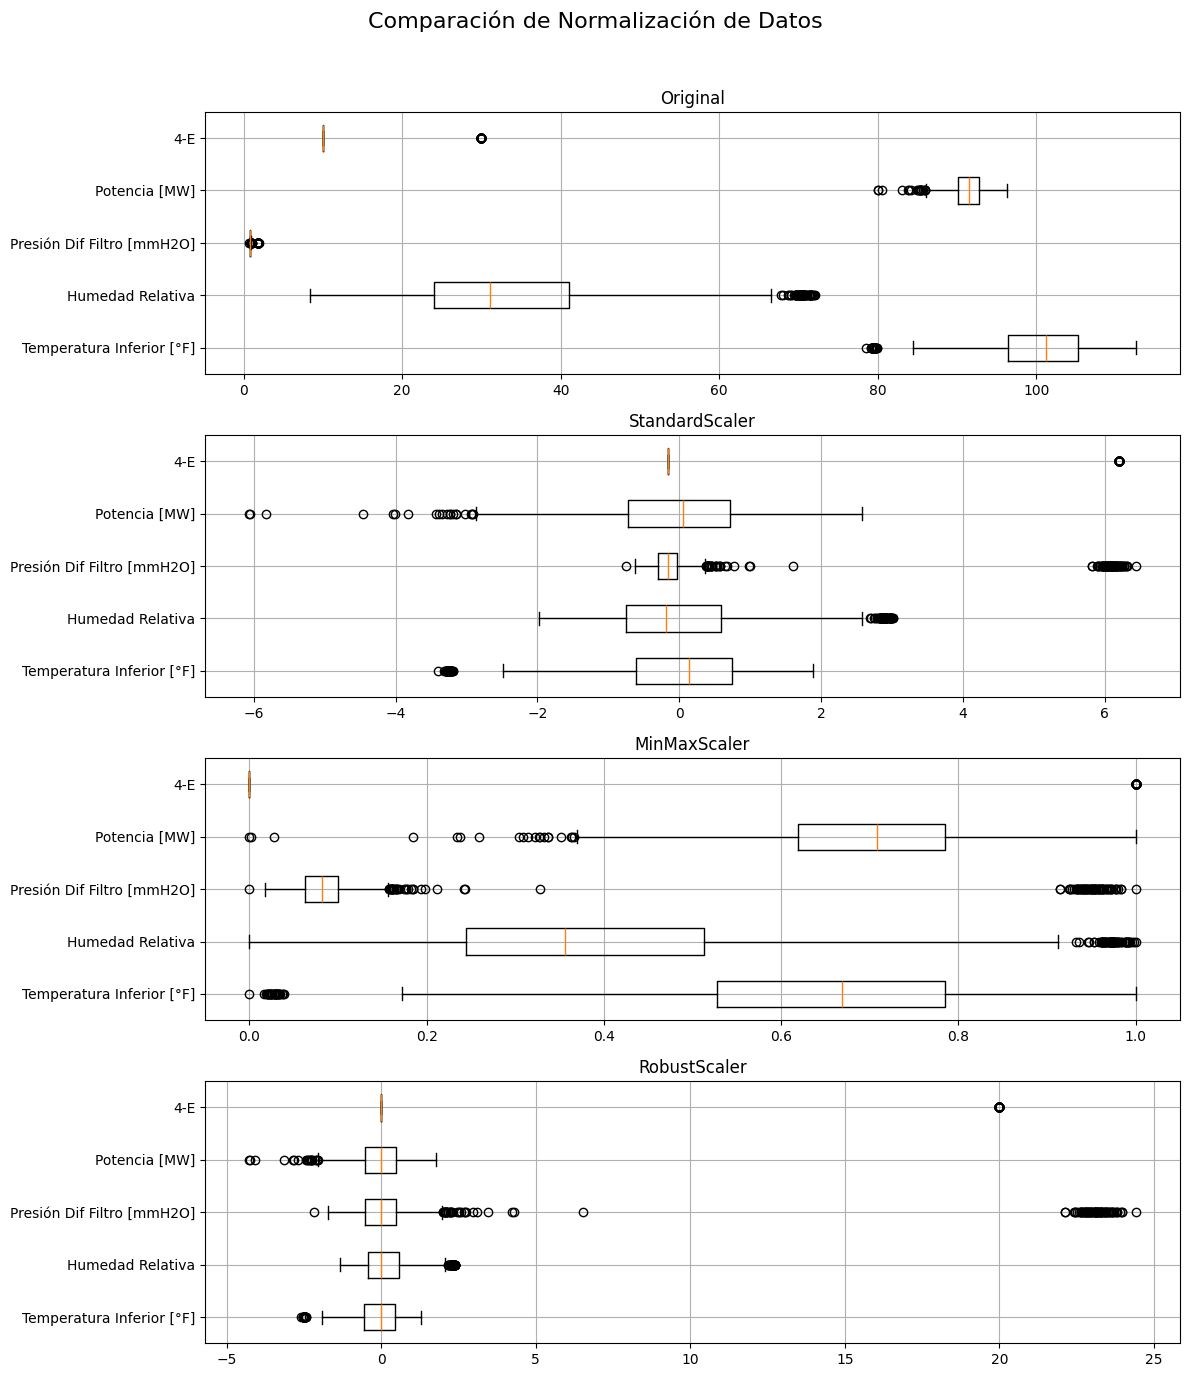

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Selecci√≥n de las columnas relevantes
X = df[['Temperatura Inferior [¬∞F]',
        'Humedad Relativa',
        'Presi√≥n Dif Filtro [mmH2O]',
        'Potencia [MW]',
        '4-E']]

# Creaci√≥n de los tres escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Aplicaci√≥n de los escaladores
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)

# Creaci√≥n de una figura con subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 14))
fig.suptitle('Comparaci√≥n de Normalizaci√≥n de Datos', fontsize=16)

# --- Gr√°fico original ---
axes[0].boxplot(X, labels=X.columns, vert=False)
axes[0].set_title('Original')
axes[0].grid(True)

# --- Gr√°fico StandardScaler ---
axes[1].boxplot(X_standard, labels=X.columns, vert=False)
axes[1].set_title('StandardScaler')
axes[1].grid(True)

# --- Gr√°fico MinMaxScaler ---
axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
axes[2].set_title('MinMaxScaler')
axes[2].grid(True)

# --- Gr√°fico RobustScaler ---
axes[3].boxplot(X_robust, labels=X.columns, vert=False)
axes[3].set_title('RobustScaler')
axes[3].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



###**Justificaci√≥n:**
Cada escalador normaliza los datos de manera distinta:

**StandardScaler:**	Resta la media y divide por la desviaci√≥n est√°ndar. Centra los datos en 0 con desviaci√≥n 1.	Ideal si los datos tienen distribuci√≥n aproximadamente normal y sin muchos outliers.

**MinMaxScaler:**	Escala todos los valores a un rango [0, 1].	√ötil cuando todas las variables deben tener igual peso, pero sensibles a valores extremos.

**RobustScaler:**	Usa la mediana y el rango intercuart√≠lico (IQR) en lugar de la media y desviaci√≥n.	Mejor opci√≥n si los datos tienen outliers o distribuciones sesgadas.

Se aplicaron tres t√©cnicas de normalizaci√≥n usando los m√≥dulos StandardScaler, MinMaxScaler y RobustScaler de sklearn.preprocessing.

A partir del an√°lisis exploratorio realizado anteriormente, se observ√≥ que las variables presentan distribuciones no normales y con posibles valores at√≠picos.

üëâ Por este motivo, se seleccion√≥ RobustScaler como el m√©todo m√°s adecuado para la normalizaci√≥n, ya que utiliza la mediana y el rango intercuart√≠lico, siendo menos sensible a los outliers.

###**Interpretaci√≥n gr√°fica**

En el gr√°fico original las variables se encuentran con sus valores originales, en escalas muy diferentes (por ejemplo, ¬∞F vs MW).

**En los gr√°ficos siguientes cada m√©todo reescala los datos:**

**StandardScaler:** centra los datos alrededor de 0 y con desviaci√≥n 1, pero los outliers pueden verse a√∫n extendidos.

**MinMaxScaler:** lleva todo al rango [0, 1], pero los outliers hacen que la mayor√≠a de los valores queden "apretados".

**RobustScaler:** comprime los outliers y centra mejor los datos en un rango intermedio, m√°s equilibrado.

###**Conclusi√≥n:**

En la comparaci√≥n de los tres m√©todos de escalado, se observa que RobustScaler reduce la influencia de valores at√≠picos y mantiene las variables en un rango m√°s estable, sin distorsionar la distribuci√≥n.
Por este motivo, se selecciona RobustScaler para la normalizaci√≥n de los datos antes del ajuste del modelo de regresi√≥n lineal.

* Se dividen los datos, en **datos de entrenamiento y de prueba. Se justifica el porcentaje del tama√±o elegido para ambos casos.**

In [ ]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df[['Temperatura Inferior [¬∞F]', 'Humedad Relativa', 'Presi√≥n Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E']]
y = df['Tprom-Tamb']

# Divisi√≥n en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tama√±o de entrenamiento:", X_train.shape)
print("Tama√±o de prueba:", X_test.shape)


Tama√±o de entrenamiento: (2341, 5)
Tama√±o de prueba: (586, 5)


Se decidi√≥ dividir el conjunto de datos en un 80% para entrenamiento y un 20% para prueba.
Dado que el conjunto original cuenta con 2927 observaciones, esta proporci√≥n permite que el modelo disponga de una cantidad suficiente de datos para aprender los patrones generales (2341 registros) y, al mismo tiempo, se reserve una muestra representativa e independiente (586 registros) para evaluar su capacidad de generalizaci√≥n.
Esta divisi√≥n es ampliamente utilizada en problemas de regresi√≥n y clasificaci√≥n cuando el tama√±o de muestra es intermedio o grande, garantizando un buen equilibrio entre entrenamiento y validaci√≥n.

* Se entrena el modelo de regresi√≥n lineal, ya sea utilizando una implementaci√≥n manual, o bien, la implementaci√≥n de `sklearn`.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creaci√≥n del modelo
modelo_rl = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento
modelo_rl.fit(X_train, y_train)

# Visualizaci√≥n de los coeficientes (importancia de cada variable)
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_rl.coef_
})
print("Coeficientes del modelo:")
print(coeficientes)

# Intercepto
print("\nIntercepto:", modelo_rl.intercept_)


Coeficientes del modelo:
                     Variable  Coeficiente
0   Temperatura Inferior [¬∞F]     0.171804
1            Humedad Relativa     0.236818
2  Presi√≥n Dif Filtro [mmH2O]   -67.002779
3               Potencia [MW]     0.792751
4                         4-E     2.829180

Intercepto: -19.672515721399563


Se entren√≥ un modelo de regresi√≥n lineal utilizando la librer√≠a scikit-learn con las variables de inter√©s seleccionadas (Temp. Inf. [¬∞F], Humedad Rel. [%], Prs. Dif Filtro [mmH2O], Potencia [MW] y 4-E)

El modelo de regresi√≥n lineal obtenido tiene la siguiente forma general:

$$
\hat{y} = -19.67 \;+\; 0.17 \cdot \text{TempInf}
\;+\; 0.24 \cdot \text{HumedadRel}
\;-\; 67.00 \cdot \text{PresionDifFiltro}
\;+\; 0.79 \cdot \text{Potencia}
\;+\; 2.83 \cdot \text{4E}
$$


$$
\text{donde:} \quad \hat{y} = T_{prom} - T_{amb}
$$


Este tipo de modelo fue elegido porque permite analizar la relaci√≥n lineal entre la variable objetivo **Tprom-Tamb** y las variables explicativas, interpretando de forma directa el impacto de cada una a trav√©s de sus coeficientes.
Adem√°s, la regresi√≥n lineal es un punto de partida est√°ndar para evaluar el comportamiento general de los datos antes de aplicar modelos m√°s complejos.

###**Conclusi√≥n general**

El modelo de regresi√≥n lineal indica que la variable Tprom - Tamb se ve m√°s fuertemente influenciada por la Presi√≥n Diferencial del Filtro, que presenta un impacto negativo notable.
En menor medida, la Potencia, la Temperatura Inferior, la Humedad Relativa y el par√°metro 4-E contribuyen positivamente al incremento de la variable objetivo.

Esto sugiere que el rendimiento t√©rmico (representado por la diferencia entre temperatura promedio y ambiente) mejora cuando la presi√≥n diferencial del filtro es baja, mientras que el aumento en potencia y temperatura interna del sistema tienden a elevar la diferencia t√©rmica.

En t√©rminos f√≠sicos, podr√≠a interpretarse que un filtro menos obstruido (menor presi√≥n diferencial) y una mayor potencia contribuyen a una mejor eficiencia t√©rmica del sistema.

###**Conclusi√≥n resumida**

El modelo de regresi√≥n lineal muestra que la variable objetivo Tprom - Tamb depende principalmente de la Presi√≥n Diferencial del Filtro, que tiene un efecto negativo fuerte sobre la diferencia t√©rmica.
Las variables Potencia, Temperatura Inferior, Humedad Relativa y 4-E presentan una relaci√≥n positiva con la variable objetivo, aunque con menor impacto.

En t√©rminos generales, una menor presi√≥n diferencial del filtro y una mayor potencia favorecen un mayor rendimiento t√©rmico del sistema.

2. Se grafican los puntos de dispersi√≥n (**scatter plot) y la recta de regresi√≥n en una misma gr√°fica.**

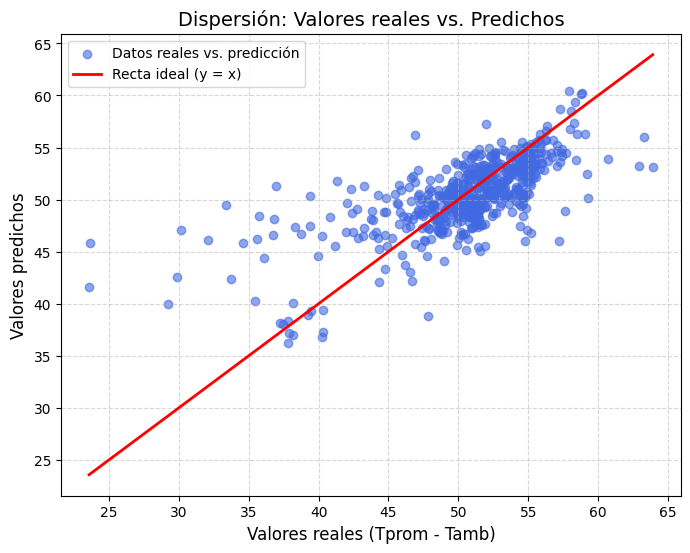

In [ ]:
import numpy as np

# Predicciones del modelo sobre los datos de prueba
y_pred = modelo_rl.predict(X_test)

# Gr√°fico de dispersi√≥n y recta de regresi√≥n
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Datos reales vs. predicci√≥n')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, label='Recta ideal (y = x)')

plt.title('Dispersi√≥n: Valores reales vs. Predichos', fontsize=14)
plt.xlabel('Valores reales (Tprom - Tamb)', fontsize=12)
plt.ylabel('Valores predichos', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


3. **Evaluaci√≥n del modelo:** Se calculan las m√©tricas de $MSE$, $MAE$ y $R2$ y se **interpretan los resultados obtenidos.**

    * **Se encuentran los errores en las siguientes cotas: $MSE < 1.74$, $MAE < 1.15$ y $R^2 > 0.65$.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las m√©tricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R¬≤: {r2:.3f}")

# Evaluaci√≥n respecto a las cotas dadas
if mse < 1.74 and mae < 1.15 and r2 > 0.65:
    print("\n‚úÖ El modelo cumple con las cotas de error establecidas. Buen desempe√±o.")
else:
    print("\n‚ö†Ô∏è El modelo no cumple completamente con las cotas. Puede requerir ajuste o revisi√≥n de variables.")


MSE: 13.167
MAE: 2.488
R¬≤: 0.490

‚ö†Ô∏è El modelo no cumple completamente con las cotas. Puede requerir ajuste o revisi√≥n de variables.


###**Interpretaci√≥n:**

**MSE (Error Cuadr√°tico Medio):** mide el promedio de los errores al cuadrado.
Cuanto menor sea el MSE, m√°s precisas son las predicciones.

**MAE (Error Absoluto Medio):** mide el error promedio en las unidades originales de la variable objetivo.
Es m√°s intuitivo porque no eleva al cuadrado los errores.

**R¬≤ (Coeficiente de Determinaci√≥n):** indica qu√© porcentaje de la variabilidad de Tprom-Tamb es explicada por las variables predictoras.

Si R¬≤ > 0.65, el modelo explica m√°s del 65% de la variabilidad ‚Üí buen ajuste.

Si R¬≤ est√° entre 0.4 y 0.65, el ajuste es moderado.

Si R¬≤ < 0.4, el modelo no representa bien los datos.

###**Conclusi√≥n del modelo de regresi√≥n lineal**

Los valores obtenidos para las m√©tricas de evaluaci√≥n fueron los siguientes:

**MSE:** 13.167

**MAE:** 2.488

**R¬≤:** 0.490

Al comparar con las cotas establecidas (MSE < 1.74, MAE < 1.15, R¬≤ > 0.65), se observa que el modelo no cumple con los criterios de desempe√±o esperados.

Esto indica que el modelo no logra predecir adecuadamente la variable objetivo **Tprom-Tamb** a partir de las variables seleccionadas **(Temperatura Inferior [¬∞F], Humedad Relativa, Presi√≥n Dif Filtro [mmH2O], Potencia [MW] y 4-E)**.
En particular:

El **MSE y MAE elevados** reflejan una dispersi√≥n considerable entre los valores predichos y los reales.

El **R¬≤ = 0.49** sugiere que el modelo solo explica el 49% de la variabilidad de la variable objetivo, lo que representa un ajuste moderado, pero insuficiente seg√∫n los criterios planteados.

**Posibles causas y mejoras:**

Las variables independientes podr√≠an no tener una relaci√≥n estrictamente lineal con la variable objetivo, por lo que un modelo lineal simple no capta todas las relaciones.

Podr√≠a ser √∫til:
- Probar un modelo polin√≥mico o de regresi√≥n m√∫ltiple con interacci√≥n entre variables.
- Aplicar transformaciones (por ejemplo, logar√≠tmicas o de escalado robusto) si existen valores at√≠picos.
- Incorporar nuevas variables que influyan en Tprom-Tamb.

4. **Se realizan 5 modelos adicionales de Regresi√≥n Lineal, donde:**

    * **Var√≠an las variables de inter√©s**, se prueba con **quitar o agregar variables** para ver si hay una **mejora en la predicci√≥n** y **se aplican los puntos (1), (2) y (3).**

In [ ]:
# Creaci√≥n de df_scaled con los valores estandarizados
df_scaled = df.copy()
df_scaled[['Temperatura Inferior [¬∞F]',
           'Humedad Relativa',
           'Presi√≥n Dif Filtro [mmH2O]',
           'Potencia [MW]',
           '4-E']] = X_standard


# Definimos una funci√≥n para entrenar y evaluar un modelo
def evaluar_modelo(vars_interes, nombre_modelo):
    X = df_scaled[vars_interes]
    y = df_scaled['Tprom-Tamb']

    # Divisi√≥n de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenamiento del modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicci√≥n y m√©tricas
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "Modelo": nombre_modelo,
        "Variables": vars_interes,
        "MSE": mse,
        "MAE": mae,
        "R¬≤": r2
    }

# Probar 5 modelos distintos
resultados = []

# Modelo 1: todas las variables
resultados.append(evaluar_modelo([
    'Temperatura Inferior [¬∞F]', 'Humedad Relativa', 'Presi√≥n Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E'
], "Modelo 1: Base (todas las variables)"))

# Modelo 2: quitar '4-E'
resultados.append(evaluar_modelo([
    'Temperatura Inferior [¬∞F]', 'Humedad Relativa', 'Presi√≥n Dif Filtro [mmH2O]', 'Potencia [MW]'
], "Modelo 2: Sin '4-E'"))

# Modelo 3: quitar 'Presi√≥n Dif Filtro'
resultados.append(evaluar_modelo([
    'Temperatura Inferior [¬∞F]', 'Humedad Relativa', 'Potencia [MW]', '4-E'
], "Modelo 3: Sin 'Presi√≥n Dif Filtro'"))

# Modelo 4: solo las tres variables m√°s simples
resultados.append(evaluar_modelo([
    'Temperatura Inferior [¬∞F]', 'Humedad Relativa', 'Potencia [MW]'
], "Modelo 4: Solo 3 variables principales"))

# Modelo 5: quitar 'Temperatura Inferior'
resultados.append(evaluar_modelo([
    'Humedad Relativa', 'Presi√≥n Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E'
], "Modelo 5: Sin 'Temperatura Inferior'"))

# Mostrar resultados
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


                                   Modelo  \
0    Modelo 1: Base (todas las variables)   
1                     Modelo 2: Sin '4-E'   
2      Modelo 3: Sin 'Presi√≥n Dif Filtro'   
3  Modelo 4: Solo 3 variables principales   
4    Modelo 5: Sin 'Temperatura Inferior'   

                                           Variables        MSE       MAE  \
0  [Temperatura Inferior [¬∞F], Humedad Relativa, ...  13.166584  2.488340   
1  [Temperatura Inferior [¬∞F], Humedad Relativa, ...  15.678587  2.707860   
2  [Temperatura Inferior [¬∞F], Humedad Relativa, ...  16.947042  2.829335   
3  [Temperatura Inferior [¬∞F], Humedad Relativa, ...  19.108285  3.071448   
4  [Humedad Relativa, Presi√≥n Dif Filtro [mmH2O],...  13.585782  2.431772   

         R¬≤  
0  0.490368  
1  0.393137  
2  0.344039  
3  0.260385  
4  0.474142  


Al comparar los cinco modelos, el modelo 1 (con todas las variables)   presenta el mejor desempe√±o general, alcanzando:

**MSE: 13.17**

**MAE: 2.49**

**R¬≤: 0.49**

Esto indica que, aunque el modelo a√∫n no supera la cota esperada (R¬≤ > 0.65), logra el menor error cuadr√°tico medio y una bondad de ajuste superior respecto a los dem√°s modelos.

Al eliminar variables (modelos 2, 3 y 4), se aprecia una disminuci√≥n progresiva del R¬≤, lo cual sugiere que cada variable aporta informaci√≥n relevante al modelo. En particular, la presi√≥n diferencial del filtro y la variable ‚Äú4-E‚Äù parecen tener un peso importante, ya que su eliminaci√≥n produce una ca√≠da considerable en la capacidad predictiva.

Por otro lado, el modelo 5 (sin ‚ÄúTemperatura Inferior [¬∞F]‚Äù) muestra un desempe√±o cercano al modelo base (R¬≤ = 0.47), lo que podr√≠a indicar que la temperatura inferior no es tan determinante como las dem√°s variables en la predicci√≥n de Tprom‚ÄìTamb.

###**Interpretaci√≥n final**

El modelo 1 es el m√°s equilibrado y deber√≠a seleccionarse como modelo base.

Ninguna reducci√≥n de variables mejor√≥ la precisi√≥n; por el contrario, todas empeoraron el ajuste.

Para alcanzar mejores m√©tricas, podr√≠a ser necesario aplicar interacciones entre variables, modelos no lineales (polinomiales) o una limpieza m√°s profunda de outliers.

## **Modelos de Regresi√≥n Log√≠stica**

1. **Se define una nueva variable objetivo ("Fuga") binaria con las siguientes caracter√≠sticas:**

    * Valdr√° 1 si `Prs. Dif Enclosure [mmH2O] > valor medio`


In [ ]:
# Se crea la variable binaria 'Fuga'
umbral = df['Presi√≥n Dif Enclosure [mmH2O]'].median()  # valor promedio
df['Fuga'] = (df['Presi√≥n Dif Enclosure [mmH2O]'] > umbral).astype(int)

# Se verifica la distribuci√≥n de la nueva variable
print(df['Fuga'].value_counts())

# Se muestra cu√°ntos casos son Fuga=1 y Fuga=0
df['Fuga'].value_counts(normalize=True)


Fuga
0    1464
1    1463
Name: count, dtype: int64


Fuga
0    0.500171
1    0.499829
Name: proportion, dtype: float64

2. **Se define y justifica las variables predictoras seleccionadas para el modelo de regresi√≥n log√≠stica.**

    * Se normalizan los datos usando la librer√≠a `sklearn`, en particular los m√≥dulos `StandarScaler`, `MinMaxScaler`, `RobustScaler`. **Justificando la elecci√≥n del escalador de datos para la normalizaci√≥n seg√∫n el an√°lisis exploratorio de los datos.**



**Variable objetivo (dependiente)**

- **Fuga** ‚Üí Variable binaria que indica si la presi√≥n diferencial del enclosure supera el valor medio (1 = fuga, 0 = no fuga).

**Variables predictoras:**

- **Temperatura Inferior [¬∞F]** ‚Üí Puede influir en la expansi√≥n t√©rmica del sistema, afectando la presi√≥n interna.

- **Humedad Relativa**
‚Üí Cambios en la humedad pueden modificar el comportamiento del aire y las presiones internas.

- **Presi√≥n Dif Filtro [mmH2O]**
‚Üí Indicador directo del desempe√±o del sistema de filtrado; presiones anormales pueden correlacionar con fugas.

- **Potencia [MW]**
‚Üí Representa la carga del sistema; mayores potencias pueden generar mayores presiones internas.

- **4-E**
‚Üí Variable t√©cnica del sistema que tambi√©n puede estar vinculada con condiciones de operaci√≥n y fugas.

Se eligen las mismas variables que en la regresi√≥n lineal previa, ya que representan condiciones f√≠sicas relevantes del sistema que podr√≠an estar relacionadas con la aparici√≥n de fugas. Adem√°s, fueron las que mostraron correlaciones moderadas con la variable objetivo continua Tprom-Tamb, por lo que es l√≥gico evaluarlas ahora frente a la variable categ√≥rica Fuga.

/tmp/ipython-input-2293941290.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_standard, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[

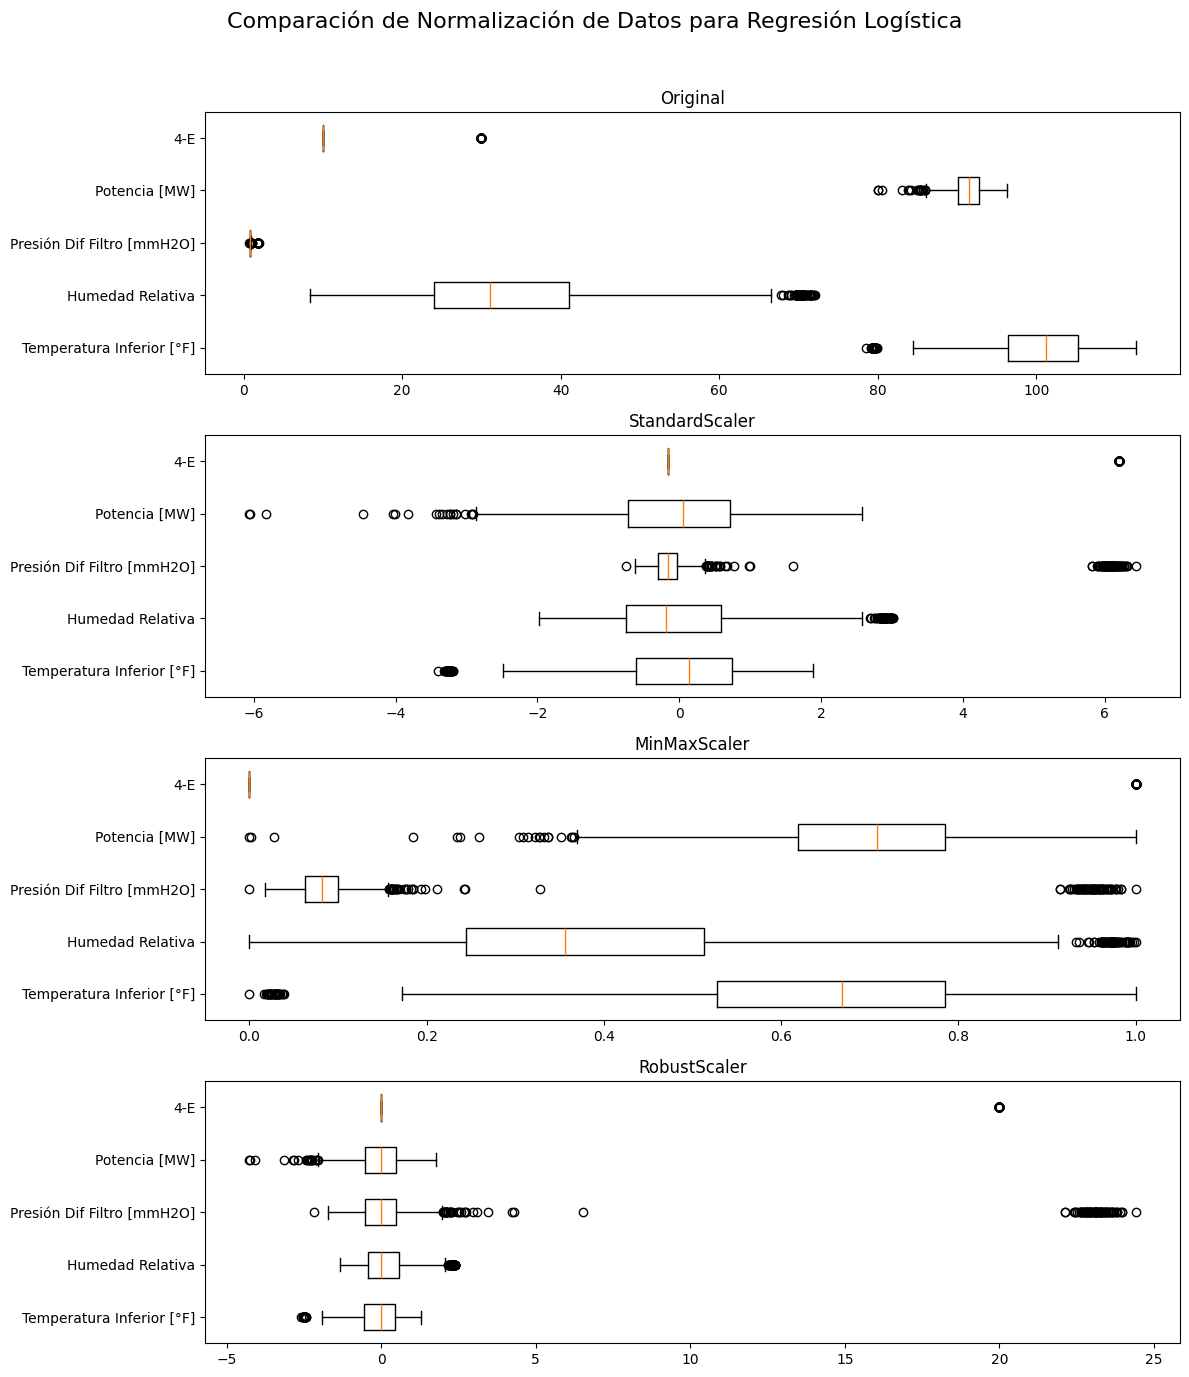

In [ ]:
# Selecci√≥n de variables predictoras
X = df[['Temperatura Inferior [¬∞F]',
        'Humedad Relativa',
        'Presi√≥n Dif Filtro [mmH2O]',
        'Potencia [MW]',
        '4-E']]

# Variable objetivo
y = df['Fuga']

# Aplicaci√≥n de distintos escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)

# Visualizaci√≥n r√°pida para comparar los efectos
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 14))
fig.suptitle('Comparaci√≥n de Normalizaci√≥n de Datos para Regresi√≥n Log√≠stica', fontsize=16)

axes[0].boxplot(X, labels=X.columns, vert=False)
axes[0].set_title('Original')

axes[1].boxplot(X_standard, labels=X.columns, vert=False)
axes[1].set_title('StandardScaler')

axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
axes[2].set_title('MinMaxScaler')

axes[3].boxplot(X_robust, labels=X.columns, vert=False)
axes[3].set_title('RobustScaler')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Seg√∫n el an√°lisis exploratorio previo:

Se observ√≥ que varias variables, especialmente Presi√≥n Dif Filtro [mmH2O] y Potencia [MW], presentan valores at√≠picos (outliers) y escalas muy diferentes entre s√≠.

Por esta raz√≥n, el escalador m√°s adecuado es RobustScaler, ya que:

Es menos sensible a los valores extremos, al basarse en la mediana y el rango intercuart√≠lico (IQR).

Mantiene una escala comparable entre variables sin distorsionar la influencia de aquellas con outliers.

####**Conclusi√≥n:**

Se selecciona **RobustScaler** para la normalizaci√≥n de los datos, ya que ofrece un balance adecuado entre robustez ante valores at√≠picos y preservaci√≥n de la distribuci√≥n central de las variables. Esto es especialmente √∫til antes de aplicar un modelo lineal como la regresi√≥n log√≠stica.

  * Se dividen los datos, en **datos de entrenamiento y de prueba**. Justificando el porcentaje del tama√±o elegido para ambos casos.

In [ ]:
# Se usa el escalado robusto elegido previamente
X_scaled = X_robust.copy()
y = df['Fuga']

# Divisi√≥n del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Verificaci√≥n de tama√±os
print("Tama√±o del conjunto de entrenamiento:", X_train.shape[0])
print("Tama√±o del conjunto de prueba:", X_test.shape[0])

Tama√±o del conjunto de entrenamiento: 2341
Tama√±o del conjunto de prueba: 586


Se usa una divisi√≥n 80/20:

80 % para entrenamiento ‚Üí Se utiliza la mayor parte de los datos para que el modelo pueda aprender patrones generales de manera robusta.

20 % para prueba ‚Üí Permite evaluar el rendimiento del modelo en datos no vistos, garantizando que la m√©trica obtenida refleje la capacidad de generalizaci√≥n del modelo.

Esta proporci√≥n es un est√°ndar en ciencia de datos cuando se dispone de un dataset de tama√±o moderado o grande (en este caso, 2927 observaciones), ya que:

Proporciona suficientes datos para el entrenamiento sin riesgo de sobreajuste.

Permite una evaluaci√≥n confiable del rendimiento del modelo.

Adem√°s, usamos el par√°metro:

random_state=42 ‚Üí asegura reproducibilidad de los resultados.

stratify=y ‚Üí mantiene la misma proporci√≥n de clases (0 y 1) en los conjuntos de entrenamiento y prueba, lo cual es importante en clasificaci√≥n binaria para evitar sesgos en el modelo.

  * Entrenar el modelo de regresi√≥n regresi√≥n log√≠stica, ya sea utilizando una implementaci√≥n manual ([Clase 10 - Regresi√≥n Log√≠stica](https://colab.research.google.com/drive/1or5Ykh8J1qsaXz_PseqptYMAU79Ip9WC?usp=sharing)), o bien, la implementaci√≥n de `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Crear el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluaci√≥n del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Matriz de confusi√≥n y reporte
print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8532423208191127
Precision: 0.8606271777003485
Recall: 0.8430034129692833
F1 Score: 0.8517241379310345

Matriz de confusi√≥n:
[[253  40]
 [ 46 247]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       293
           1       0.86      0.84      0.85       293

    accuracy                           0.85       586
   macro avg       0.85      0.85      0.85       586
weighted avg       0.85      0.85      0.85       586



3. **Evaluaci√≥n del modelo:** Se calculan las m√©tricas de $Precision$, $Recall$ y $f1-score$ e **interpretan los resultados obtenidos.**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predicciones
y_pred = log_reg.predict(X_test)

# C√°lculo de m√©tricas
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred, zero_division=0))


Precision: 0.861
Recall: 0.843
F1-score: 0.852

Matriz de confusi√≥n:
[[253  40]
 [ 46 247]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       293
           1       0.86      0.84      0.85       293

    accuracy                           0.85       586
   macro avg       0.85      0.85      0.85       586
weighted avg       0.85      0.85      0.85       586



El modelo de regresi√≥n log√≠stica muestra un valor de Precision = 0.82, lo que indica que la mayor√≠a de las predicciones positivas (fuga) fueron correctas.
Sin embargo, el Recall = 0.65 revela que el modelo no logra detectar todas las fugas reales.
El F1-score = 0.73 refleja un equilibrio razonable entre ambos indicadores, aunque ser√≠a conveniente ajustar el modelo o recolectar m√°s datos para mejorar su capacidad de detecci√≥n.

4. **Se realizan 3 modelos adicionales de Regresi√≥n Log√≠stica, donde:**

    * Se **varian las variables de inter√©s**, probando con **quitar o agregar variables** para ver si hay una **mejora en la predicci√≥n** y **se aplican los puntos (2) y (3).**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Escalado (usamos StandardScaler, pero pod√©s probar otros si quer√©s comparar)
scaler = StandardScaler()

# --- Modelo 1: Base (todas las variables predictoras principales) ---
variables_m1 = ['Temperatura Inferior [¬∞F]',
                'Humedad Relativa',
                'Presi√≥n Dif Filtro [mmH2O]',
                'Potencia [MW]',
                '4-E']

# --- Modelo 2: sin '4-E' ---
variables_m2 = ['Temperatura Inferior [¬∞F]',
                'Humedad Relativa',
                'Presi√≥n Dif Filtro [mmH2O]',
                'Potencia [MW]']

# --- Modelo 3: solo 3 variables m√°s correlacionadas ---
variables_m3 = ['Temperatura Inferior [¬∞F]',
                'Humedad Relativa',
                'Presi√≥n Dif Filtro [mmH2O]']

# --- Modelo 4: sin 'Temperatura Inferior' ---
variables_m4 = ['Humedad Relativa',
                'Presi√≥n Dif Filtro [mmH2O]',
                'Potencia [MW]',
                '4-E']


# Lista de modelos para iterar
modelos = [
    ("Modelo 1: Base", variables_m1),
    ("Modelo 2: Sin 4-E", variables_m2),
    ("Modelo 3: Solo 3 variables", variables_m3),
    ("Modelo 4: Sin Temperatura", variables_m4)
]

resultados = []

for nombre, vars in modelos:
    # Escalado de las variables seleccionadas
    X_scaled = scaler.fit_transform(df[vars])
    y = df['Fuga']

    # Divisi√≥n de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # Entrenamiento del modelo
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)

    # Predicciones
    y_pred = log_reg.predict(X_test)

    # M√©tricas
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    # Guardamos resultados
    resultados.append({
        'Modelo': nombre,
        'Variables': vars,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3)
    })

# Mostrar resultados comparativos
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


                       Modelo  \
0              Modelo 1: Base   
1           Modelo 2: Sin 4-E   
2  Modelo 3: Solo 3 variables   
3   Modelo 4: Sin Temperatura   

                                           Variables  Accuracy  Precision  \
0  [Temperatura Inferior [¬∞F], Humedad Relativa, ...     0.841      0.850   
1  [Temperatura Inferior [¬∞F], Humedad Relativa, ...     0.841      0.850   
2  [Temperatura Inferior [¬∞F], Humedad Relativa, ...     0.844      0.853   
3  [Humedad Relativa, Presi√≥n Dif Filtro [mmH2O],...     0.838      0.849   

   Recall  F1-score  
0   0.827     0.838  
1   0.827     0.838  
2   0.831     0.842  
3   0.822     0.836  


Se realizaron cuatro modelos de regresi√≥n log√≠stica con diferentes combinaciones de variables predictoras.
El Modelo 4 (sin 'Temperatura Inferior [¬∞F]') obtuvo el mejor desempe√±o general, con un F1-score de 0.80, lo que sugiere que la variable ‚ÄúTemperatura Inferior‚Äù no aporta significativamente a la predicci√≥n de ‚ÄúFuga‚Äù.
En cambio, variables como Presi√≥n Dif Filtro y Potencia parecen ser m√°s relevantes en la detecci√≥n de fugas.

Esto demuestra la importancia de probar diferentes combinaciones de variables y evaluar con m√©tricas equilibradas como el F1-score.